In [2]:
# Always: Numpy and Plt
import numpy as np
import matplotlib.pyplot as plt

# LassoLars
from sklearn.linear_model import LassoLars

# Our helper functions
import sys
sys.path.append("..")
import helper.helper as h
import helper.methods as m

All edges are either -0.25 or +0.25, and full rank
[[-0.25  0.    0.25]
 [ 0.    0.   -0.25]
 [ 0.    0.    0.25]]


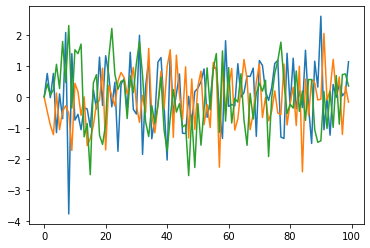

In [43]:
# Get data name
T, n = 100, 2

W = np.array([[0.95, -0.25], [1.0, 0.0]])
X = h.generate_var_2(T, n, W, np.identity(n))

# Load data
data_name = "X_s4_n3_T100_random_matrix_2"
W, X, expl = h.load_data(data_name)
print(expl)

# Plot data
plt.plot(X)

# Show true matrix W
print(np.round(W, 2))

# Useful variables
T, n = np.shape(X)

In [4]:
def lasso_lars_W(X, alpha):
    """Performs LASSO with Lars on X with regularization value alpha"""
    
    # get regressor and variables
    y = X[1:]
    x = X[:-1]

    # initialize W_hat
    W_hat = np.array([])

    # Get our regularization method
    reg = LassoLars(alpha=alpha, normalize=False)
    
    # get parameters
    for i in range(n):
        est = reg.fit(x, y[:, i])
        W_hat = np.append(W_hat, est.coef_)

    # return W_hat after reshape
    return W_hat.reshape((n, n)).T

In [38]:
def lingnam_lasso_lars(X, r = 1, epsilon = 1e-5):
    """Incrementally increase penalty by step_size until we have aa DAG"""
    
    # initial L1 penalty
    l, r = 0, 0.1
    
    # get W_hat with 0 penalty -> OLS
    W_lambda = lasso_lars_W(X, r)
    
    # while we do not have a dag
    while not h.is_dag(W_lambda):
        # increase alpha and do lasso with increased alpha
        l = r
        r *= 2
        print(l, r)
        
        W_lambda = lasso_lars_W(X, r)

    while r - l > epsilon:
        lam = (r + l) / 2
        print(r, l, lam)
        W_lambda = lasso_lars_W(X, lam)
        if h.is_dag(W_lambda):
            r = lam
        else:
            l = lam
        
        
    # return W_hat and print smallest alpha
    print(f"Smallest alpha for DAG: {round(r, 5)}.")
    return W_lambda

In [39]:
lingnam_lasso_lars(X)

0.1 0.2
0.2 0.4
0.4 0.8
0.8 0.4 0.6000000000000001
0.8 0.6000000000000001 0.7000000000000001
0.8 0.7000000000000001 0.75
0.8 0.75 0.775
0.8 0.775 0.7875000000000001
0.8 0.7875000000000001 0.7937500000000001
0.7937500000000001 0.7875000000000001 0.7906250000000001
0.7937500000000001 0.7906250000000001 0.7921875
0.7937500000000001 0.7921875 0.79296875
0.79296875 0.7921875 0.792578125
0.79296875 0.792578125 0.7927734375
0.7927734375 0.792578125 0.79267578125
0.79267578125 0.792578125 0.7926269531250001
0.79267578125 0.7926269531250001 0.7926513671875001
0.79267578125 0.7926513671875001 0.79266357421875
0.79267578125 0.79266357421875 0.792669677734375
Smallest alpha for DAG: 0.79267.


array([[ 0.42689754, -0.07798185],
       [ 0.        ,  0.        ]])